In [108]:
import pandas as pd
import numpy as np
from math import sqrt

from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing,datasets, svm

import matplotlib.pyplot as plt

In [39]:
bank_df = pd.read_csv('Universalbank.csv') 

In [40]:
Xs = bank_df.drop(columns=['Personal Loan']) #set predictor data exclusing Zip Code and ID
y = bank_df['Personal Loan'] #set prediction target

In [41]:
X = scale(Xs) #preprocess data by scaling 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) #setting test split of 40% data

In [72]:
knn = KNeighborsClassifier(n_neighbors=1) #set nearest neighbors to 1
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=1)

In [73]:
accuracy = knn.score(X_test, y_test) #check accuracy of model
print(accuracy)

0.952


In [85]:
pred = knn.predict(X_test)
print(knn.predict(X_test))

[0 0 0 ... 0 0 0]


In [76]:
print(confusion_matrix(y_test,pred)) #confusion matrix shows 21 false positigves and 75 false negatives

[[1789   21]
 [  75  115]]


In [70]:
error_rate = []  #test range of 1-20 k values to see which has lowest error rate
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error Rate')

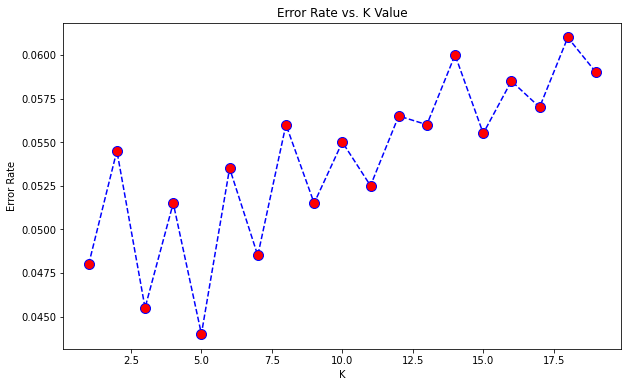

In [145]:
plt.figure(figsize=(10,6)) #plot graph for lowest k value across 20 k values
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#graph shows the best k fit being at 5 where numbers past 5 display overfitting

In [50]:
example = np.array([0, 40, 10, 84, 0, 2, 2, 2, 0, 0, 0, 1, 1]) #test data from worksheet ('Age': 40, 'Experience': 10, 'Income': 84, 'Family': 2, 
                                                               #'CCAvg': 2, 'Education': 2, 'Mortgage': 0, 'Securities Account': 0, 'CD Account': 0,
                                                               #'Online': 1, Credit Card': 1)

In [51]:
example = example.reshape(1,-1) #address error with data shape

In [52]:
norm = np.linalg.norm(example) #normalize data to fit model

In [87]:
prediction = knn.predict(example) #show prediction of example
if prediction > .5:
    print("Accept")

Accept


In [100]:
knn = KNeighborsClassifier(n_neighbors=5) #setting k to 5 for optimum prediction ability
knn.fit(X_train, y_train) 

KNeighborsClassifier()

In [101]:
prediction = knn.predict(example) #show prediction of example
if prediction > .5:
    print("Accept")

Accept


In [109]:
knn = KNeighborsClassifier(n_neighbors=5)

In [110]:
scores = cross_val_score(knn, X, y, scoring='accuracy')

In [111]:
print(scores)

[0.947 0.956 0.962 0.941 0.951]


In [129]:
def split_stratified_into_train_val_test(bank_df, stratify_colname='y', frac_train=0.5, 
                                         frac_val=0.30, frac_test=0.2, random_state=None):
    X = bank_df
    y = bank_df[['Personal Loan']]

In [127]:
knn = KNeighborsClassifier(n_neighbors=5) #using the new data split to test example customer
knn.fit(X_train, y_train) 

KNeighborsClassifier()

In [136]:
prediction = knn.predict(example) #Customer excepts with new data split
if prediction > .5:
    print("Accept")

Accept


In [137]:
pred = knn.predict(X_test)

In [144]:
print(confusion_matrix(y_test,pred)) #confusion matrix shows far less FP but a couple more FN

[[1805    5]
 [  83  107]]
